In [1]:
import csv
import random

# ==== CONFIGURATION ====
NUM_ITEMS = 500             # Number of items
NUM_AISLES = 20             # Number of aisles
SEED = 42                   # <-- Set your fixed seed here
OUTPUT_FILE = "warehouse_items.csv"

# Optional categories
categories = ['Electronics', 'Apparel', 'Books', 'Home', 'Tools', 'Toys', 'Groceries']

# ==== SET SEED ====
random.seed(SEED)

# ==== GENERATION ====
with open(OUTPUT_FILE, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ItemID", "ItemName", "Category", "Aisle"])

    for i in range(1, NUM_ITEMS + 1):
        item_id = f"ITEM{i:04d}"
        item_name = f"Product_{random.randint(1000, 9999)}"
        category = random.choice(categories)
        aisle = f"Aisle-{random.randint(1, NUM_AISLES)}"
        writer.writerow([item_id, item_name, category, aisle])

print(f"[Seed={SEED}] Generated {NUM_ITEMS} items across {NUM_AISLES} aisles in '{OUTPUT_FILE}'.")


[Seed=42] Generated 500 items across 20 aisles in 'warehouse_items.csv'.


In [2]:
import csv
from collections import Counter, defaultdict

# ==== CONFIG ====
INPUT_FILE = "warehouse_items.csv"

# ==== READ CSV ====
items = []
categories = []
aisles = []

with open(INPUT_FILE, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        items.append(row['ItemID'])
        categories.append(row['Category'])
        aisles.append(row['Aisle'])

# ==== BASIC STATISTICS ====
total_items = len(items)
unique_items = len(set(items))
unique_categories = set(categories)
unique_aisles = set(aisles)

category_count = Counter(categories)
aisle_count = Counter(aisles)

most_common_category = category_count.most_common(1)[0]
least_common_category = category_count.most_common()[-1]

most_common_aisle = aisle_count.most_common(1)[0]
least_common_aisle = aisle_count.most_common()[-1]

# ==== PRINT SUMMARY ====
print("📦 Warehouse Item Statistics")
print("="*40)
print(f"Total items:              {total_items}")
print(f"Unique ItemIDs:           {unique_items}")
print(f"Number of Categories:     {len(unique_categories)}")
print(f"Categories:               {sorted(unique_categories)}")
print(f"Number of Aisles:         {len(unique_aisles)}")
print(f"Aisles:                   {sorted(unique_aisles)}")
print()
print(f"Most Common Category:     {most_common_category[0]} ({most_common_category[1]} items)")
print(f"Least Common Category:    {least_common_category[0]} ({least_common_category[1]} items)")
print(f"Most Populated Aisle:     {most_common_aisle[0]} ({most_common_aisle[1]} items)")
print(f"Least Populated Aisle:    {least_common_aisle[0]} ({least_common_aisle[1]} items)")


📦 Warehouse Item Statistics
Total items:              500
Unique ItemIDs:           500
Number of Categories:     7
Categories:               ['Apparel', 'Books', 'Electronics', 'Groceries', 'Home', 'Tools', 'Toys']
Number of Aisles:         20
Aisles:                   ['Aisle-1', 'Aisle-10', 'Aisle-11', 'Aisle-12', 'Aisle-13', 'Aisle-14', 'Aisle-15', 'Aisle-16', 'Aisle-17', 'Aisle-18', 'Aisle-19', 'Aisle-2', 'Aisle-20', 'Aisle-3', 'Aisle-4', 'Aisle-5', 'Aisle-6', 'Aisle-7', 'Aisle-8', 'Aisle-9']

Most Common Category:     Toys (76 items)
Least Common Category:    Apparel (63 items)
Most Populated Aisle:     Aisle-18 (35 items)
Least Populated Aisle:    Aisle-20 (13 items)


C:\Users\Patrick Kruidenberg\AppData\Local\Temp\ipykernel_17812\889420804.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_count.keys()), y=list(category_count.values()), palette="viridis")


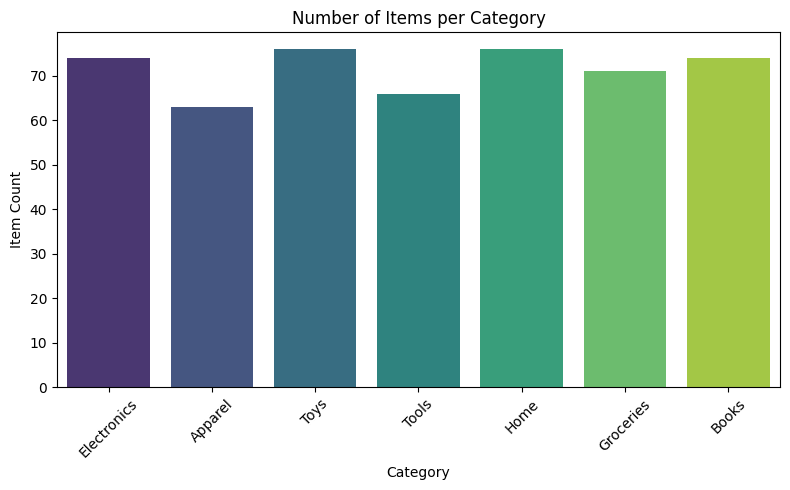

C:\Users\Patrick Kruidenberg\AppData\Local\Temp\ipykernel_17812\889420804.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[a[0] for a in sorted_aisles], y=[a[1] for a in sorted_aisles], palette="mako")


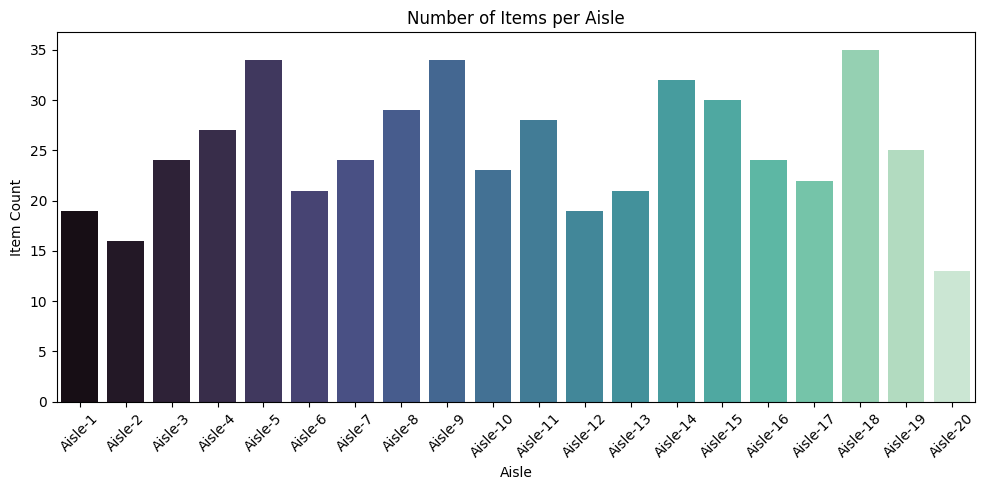

In [3]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# ==== CONFIG ====
INPUT_FILE = "warehouse_items.csv"

# ==== READ CSV ====
items = []
categories = []
aisles = []

with open(INPUT_FILE, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        items.append(row['ItemID'])
        categories.append(row['Category'])
        aisles.append(row['Aisle'])

# ==== STATISTICS ====
total_items = len(items)
category_count = Counter(categories)
aisle_count = Counter(aisles)

# ==== PLOTS ====

## 1. Bar plot: Items per Category
plt.figure(figsize=(8, 5))
sns.barplot(x=list(category_count.keys()), y=list(category_count.values()), palette="viridis")
plt.title("Number of Items per Category")
plt.xlabel("Category")
plt.ylabel("Item Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Bar plot: Items per Aisle
plt.figure(figsize=(10, 5))
sorted_aisles = sorted(aisle_count.items(), key=lambda x: int(x[0].split("-")[1]))
sns.barplot(x=[a[0] for a in sorted_aisles], y=[a[1] for a in sorted_aisles], palette="mako")
plt.title("Number of Items per Aisle")
plt.xlabel("Aisle")
plt.ylabel("Item Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

